In [59]:
import re
import pandas as pd

In [60]:
f=open('WhatsApp Chat with F.R.I.E.N.D.S.txt','r',encoding='utf-8')

In [61]:
data=f.read()

In [62]:
print(type(data))

<class 'str'>


In [63]:
pattern= r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [64]:
messages= re.split(pattern, data)[1:]


In [65]:
messages

['Group creator created group "F.R.I.E.N.D.S"\n',
 'You were added\n',
 'Sadiq Dost: <Media omitted>\n',
 'Arsalan Khan: Yeahh!!\nCongratulations🔥🤝\n',
 'Bodu: This message was deleted\n',
 'Bodu: Congratulations\n',
 'Bodu: Kaunsa liya 15 ya 15 pro\n',
 'Sadiq Dost: Thanx \n15\n',
 'Wasi 2: kyaa baat hai!!\n',
 'Wasi 2: free ho to aye?\n',
 'Tal: Offo zabardast 🔥\n',
 'Sadiq Dost: Ama aaye hain nake iska tempered aur camera lens wagera lene\n',
 'Wasi 2: achaa\n',
 'Bodu: Ab iPhone 11 ka kya kroge?\n',
 'Sadiq Dost: Bechdenge \nOlx par dalne jaa rhe hain\n',
 'Bodu: Kitna ka bech rha ho?\n',
 'Sadiq Dost: 16 ya uske upar\n',
 'Sadiq Dost: <Media omitted>\n',
 'Sadiq Dost: Yeh toh bura maan gaya\n',
 '.: Haan whi magar bura manne ka tareeka thora cazual hai\n',
 'Sadiq Dost: Hmm woh toh hai\n😂socho itna mazak udaya gaya ke khud bande ko akr bolna pad gaya\n',
 '.: 🤣\n',
 'Arsalan Khan: Saari duniya jala dega cazually😂\n',
 'Wasi 2: bol to acha rhe h lkin smjhane ka tareeka thora kazual

In [66]:
dates= re.findall(pattern, data)
dates

['25/04/20, 23:51 - ',
 '25/04/20, 23:51 - ',
 '26/11/23, 14:30 - ',
 '26/11/23, 14:32 - ',
 '26/11/23, 14:33 - ',
 '26/11/23, 14:48 - ',
 '26/11/23, 14:48 - ',
 '26/11/23, 14:48 - ',
 '26/11/23, 17:04 - ',
 '26/11/23, 17:05 - ',
 '26/11/23, 17:31 - ',
 '26/11/23, 19:05 - ',
 '26/11/23, 19:48 - ',
 '26/11/23, 19:49 - ',
 '26/11/23, 21:28 - ',
 '26/11/23, 21:53 - ',
 '26/11/23, 21:54 - ',
 '30/11/23, 00:08 - ',
 '30/11/23, 00:08 - ',
 '30/11/23, 00:09 - ',
 '30/11/23, 00:10 - ',
 '30/11/23, 00:14 - ',
 '30/11/23, 00:40 - ',
 '30/11/23, 01:46 - ',
 '30/11/23, 09:02 - ',
 '30/11/23, 11:17 - ',
 '30/11/23, 14:03 - ',
 '01/12/23, 14:00 - ',
 '01/12/23, 14:00 - ',
 '01/12/23, 14:50 - ',
 '01/12/23, 14:51 - ',
 '01/12/23, 14:51 - ',
 '01/12/23, 14:51 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:52 - ',
 '01/12/23, 14:53 - ',
 '01/12/23,

In [67]:
df = pd.DataFrame({'user_message' : messages, 'message_date' : dates})
# convert message_data type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M  - ')

df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,"Group creator created group ""F.R.I.E.N.D.S""\n",2020-04-25 23:51:00
1,You were added\n,2020-04-25 23:51:00
2,Sadiq Dost: <Media omitted>\n,2023-11-26 14:30:00
3,Arsalan Khan: Yeahh!!\nCongratulations🔥🤝\n,2023-11-26 14:32:00
4,Bodu: This message was deleted\n,2023-11-26 14:33:00


In [68]:
df.shape

(4341, 2)

In [69]:
# separate users and messages
users =[]
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:# user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Amaan\AppData\Local\Temp\ipykernel_24664\3466820676.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s',message)


,date,user,message
0,2020-04-25 23:51:00,group_notification,"Group creator created group ""F.R.I.E.N.D.S""\n"
1,2020-04-25 23:51:00,group_notification,You were added\n
2,2023-11-26 14:30:00,Sadiq Dost,<Media omitted>\n
3,2023-11-26 14:32:00,Arsalan Khan,Yeahh!!\nCongratulations🔥🤝\n
4,2023-11-26 14:33:00,Bodu,This message was deleted\n


In [70]:
df['year']=df['date'].dt.year

In [71]:
df['month']=df['date'].dt.month_name()

In [72]:
df['day']=df['date'].dt.day

In [73]:
df['hour']=df['date'].dt.hour

In [74]:
df['minute']=df['date'].dt.minute

In [75]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2020-04-25 23:51:00,group_notification,"Group creator created group ""F.R.I.E.N.D.S""\n",2020,April,25,23,51
1,2020-04-25 23:51:00,group_notification,You were added\n,2020,April,25,23,51
2,2023-11-26 14:30:00,Sadiq Dost,<Media omitted>\n,2023,November,26,14,30
3,2023-11-26 14:32:00,Arsalan Khan,Yeahh!!\nCongratulations🔥🤝\n,2023,November,26,14,32
4,2023-11-26 14:33:00,Bodu,This message was deleted\n,2023,November,26,14,33


In [76]:
words=[]
for message in df['message']:
    words.extend(message.split())
    

In [77]:
len(words)

23876

In [78]:
from urlextract import URLExtract
extractor=URLExtract()

urls=extractor.find_urls("")


In [79]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))
    

In [80]:
len(links)

48

In [81]:
x=df['user'].value_counts().head()

In [82]:
import matplotlib.pyplot as plt



In [83]:
name=x.index
count=x.values

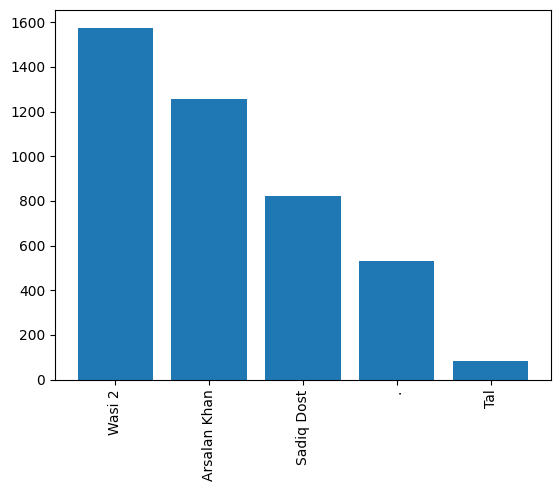

In [84]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,percent,count
0,Wasi 2,36.30
1,Arsalan Khan,28.89
2,Sadiq Dost,18.91
3,.,12.23
4,Tal,1.89
5,Bodu,1.08
6,group_notification,0.53
7,Mohd Arsalan Khan,0.16


In [86]:
words=[]
for message in df['message']:
    words.extend(message.split())
    


In [87]:
temp= df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

In [88]:
f= open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [89]:
words=[]
for message in temp['message']:
    for word in message.lower():
      if word not in stop_words:
          words.append(word)
    
    


In [90]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,,18910
1,😂,680
2,😭,433
3,/,202
4,🤣,187
5,💀,127
6,🔥,96
7,️,94
8,‍,85
9,:,76


In [91]:
import emoji

In [93]:

emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [95]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,680
1,😭,433
2,🤣,187
3,💀,127
4,🔥,96
...,...,...
87,🥱,1
88,👆,1
89,🤘,1
90,🙈,1


In [96]:
df['month_num']=df['date'].dt.month

In [99]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [100]:
timeline

,year,month_num,month,message
0,2020,4,April,2
1,2023,11,November,25
2,2023,12,December,949
3,2024,1,January,586
4,2024,2,February,89
5,2024,3,March,299
6,2024,4,April,95
7,2024,5,May,49
8,2024,6,June,107
9,2024,7,July,432


In [101]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [104]:
timeline['time']=time

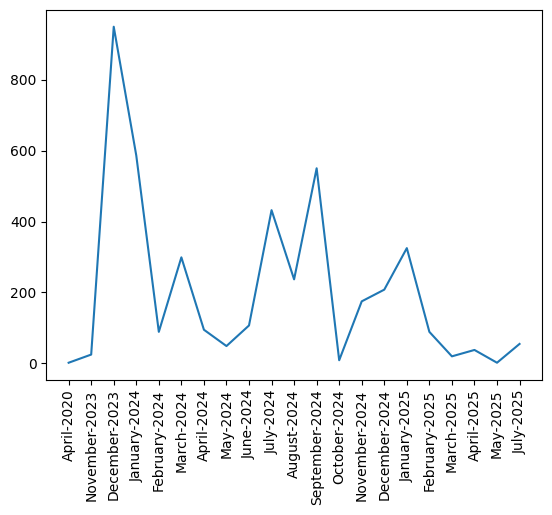

In [106]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [107]:
df['SPECIFIC_DATE']=df['date'].dt.date

In [108]:
daily_timeline=df.groupby(['SPECIFIC_DATE']).count()['message'].reset_index()

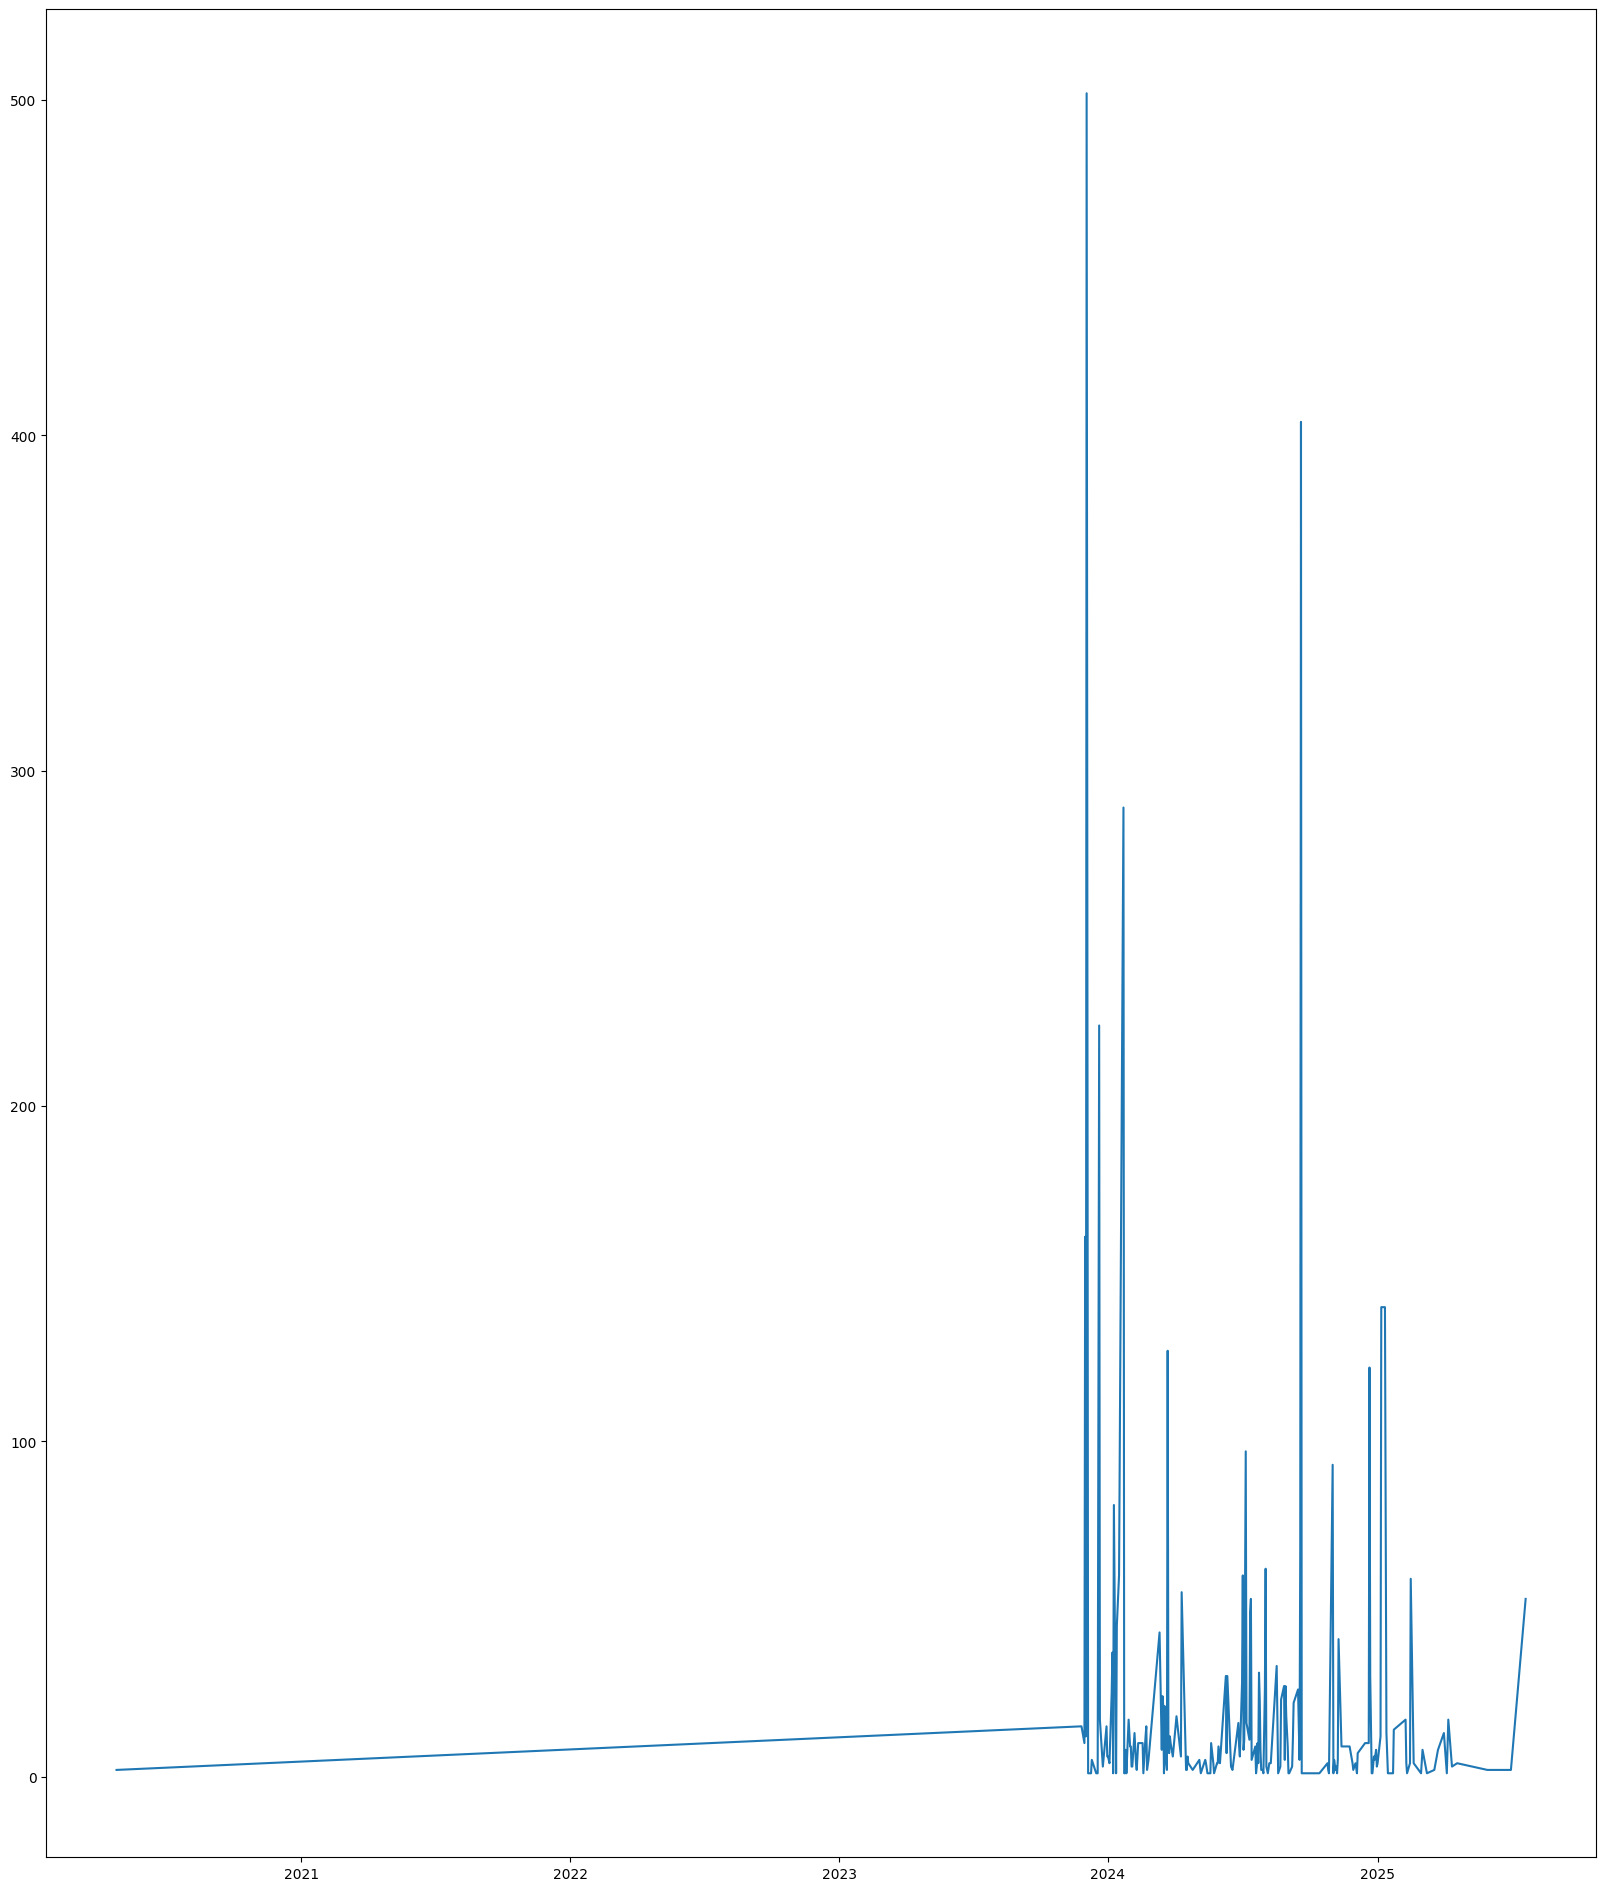

In [110]:
plt.figure(figsize=(20,24))
plt.plot(daily_timeline['SPECIFIC_DATE'],daily_timeline['message'])

In [112]:
df['day_name']=df['date'].dt.day_name()

In [114]:
df['day_name'].value_counts()

day_name
Sunday       770
Saturday     743
Monday       733
Friday       638
Thursday     634
Wednesday    487
Tuesday      336
Name: count, dtype: int64

In [122]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

   

    

In [119]:
 df['period'] = period

In [124]:
df.head()


,date,user,message,year,month,day,hour,minute,month_num,SPECIFIC_DATE,day_name,period
0,2020-04-25 23:51:00,group_notification,"Group creator created group ""F.R.I.E.N.D.S""\n",2020,April,25,23,51,4,2020-04-25,Saturday,23-00
1,2020-04-25 23:51:00,group_notification,You were added\n,2020,April,25,23,51,4,2020-04-25,Saturday,23-00
2,2023-11-26 14:30:00,Sadiq Dost,<Media omitted>\n,2023,November,26,14,30,11,2023-11-26,Sunday,14-15
3,2023-11-26 14:32:00,Arsalan Khan,Yeahh!!\nCongratulations🔥🤝\n,2023,November,26,14,32,11,2023-11-26,Sunday,14-15
4,2023-11-26 14:33:00,Bodu,This message was deleted\n,2023,November,26,14,33,11,2023-11-26,Sunday,14-15


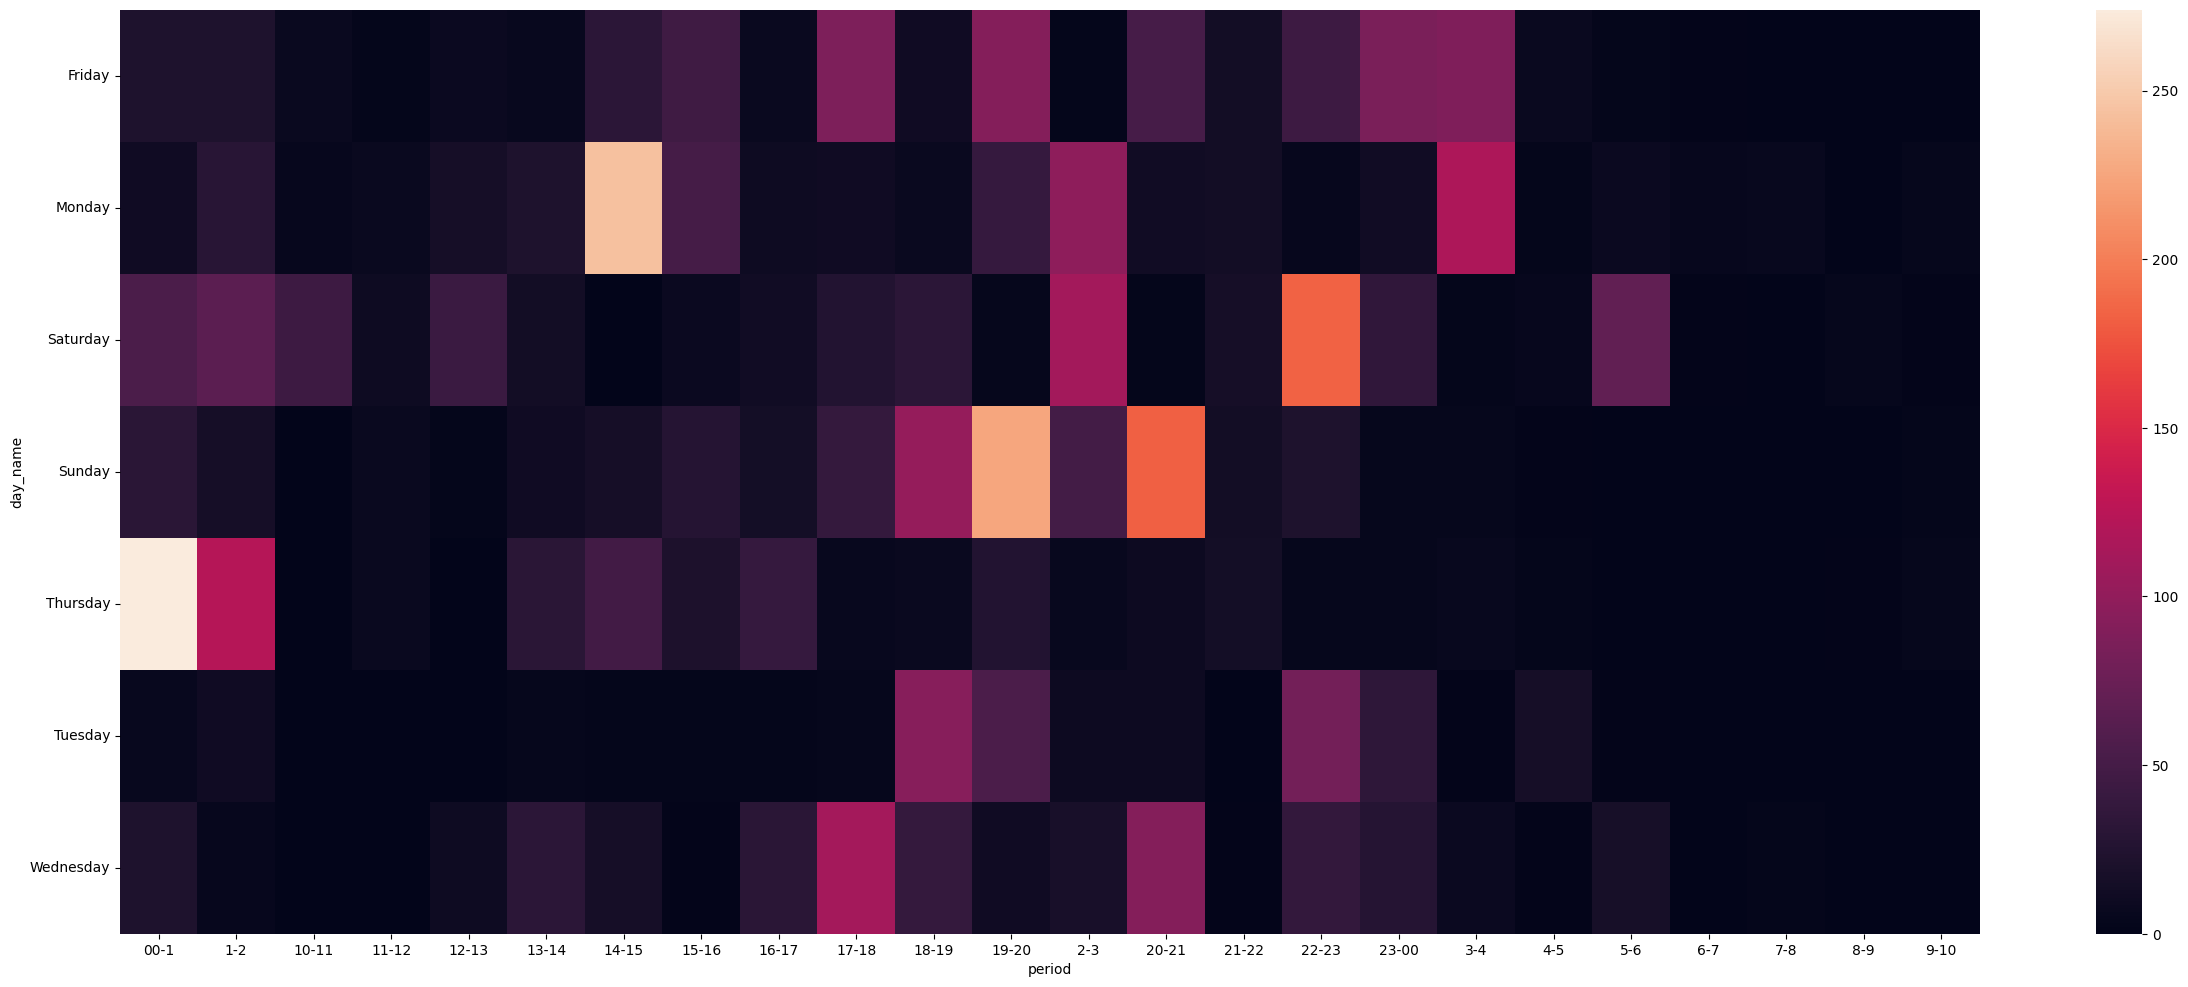

In [121]:
import seaborn as sns
plt.figure(figsize=(30,12))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()